In [9]:
# remove punctuation and stopwords in Obama's speech
import nltk
obama = open("obama_speech.txt", "r")
obamaTxt = obama.read()
#print (obamaTxt)
from string import punctuation
nltk.download("stopwords")
from nltk.corpus import stopwords
txtOba = ''.join(c for c in obamaTxt if not c.isdigit())
txtOba = ''.join(c for c in txtOba if c not in punctuation).lower()
txtOba = ' '.join([word for word in txtOba.split() if word not in (stopwords.words('english'))])
txtOba = ' '.join([word for word in txtOba.split() if word != "applause"])
print(txtOba)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\co682\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


fellow citizens stand today humbled task us grateful trust youve bestowed mindful sacrifices borne ancestors thank president bush service nation well generosity cooperation shown throughout transition fortyfour americans taken presidential oath words spoken rising tides prosperity still waters peace yet every often oath taken amidst gathering clouds raging storms moments america carried simply skill vision high office people remained faithful ideals forebears true founding documents must generation americans midst crisis well understood nation war farreaching network violence hatred economy badly weakened consequence greed irresponsibility part also collective failure make hard choices prepare nation new age homes lost jobs shed businesses shuttered health care costly schools fail many day brings evidence ways use energy strengthen adversaries threaten planet indicators crisis subject data statistics less measurable less profound sapping confidence across land nagging fear americas dec

In [10]:
# remove punctuation and stopwords in Trump's speech
trump = open("trump_speech.txt", "r")
trumpTxt = trump.read()
txtTr = ''.join(c for c in trumpTxt if not c.isdigit())
txtTr = ''.join(c for c in txtTr if c not in punctuation).lower()
txtTr = ''.join(c for c in txtTr if c !=  "–" )
txtTr = ''.join(c for c in txtTr if c !=  "’" )
txtTr = ''.join(c for c in txtTr if c !=  "“" )
txtTr = ''.join(c for c in txtTr if c !=  "”" )
txtTr = ' '.join([word for word in txtTr.split() if word not in (stopwords.words('english'))])

print(txtTr)

chief justice roberts president carter president clinton president bush president obama fellow americans people world thank citizens america joined great national effort rebuild country restore promise people together determine course america world years come face challenges confront hardships get job done every four years gather steps carry orderly peaceful transfer power grateful president obama first lady michelle obama gracious aid throughout transition magnificent todays ceremony however special meaning today merely transferring power one administration another one party another transferring power washington dc giving back american people long small group nations capital reaped rewards government people borne cost washington flourished people share wealth politicians prospered jobs left factories closed establishment protected citizens country victories victories triumphs triumphs celebrated nations capital little celebrate struggling families across land changes starting right ri

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\co682\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Requirement already up-to-date: textblob in c:\users\co682\appdata\local\programs\python\python37-32\lib\site-packages (0.15.3)
Top words in document Trump's speech
	Word: protected, TF-IDF: 0.0049
	Word: right, TF-IDF: 0.0049
	Word: dreams, TF-IDF: 0.0049


You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


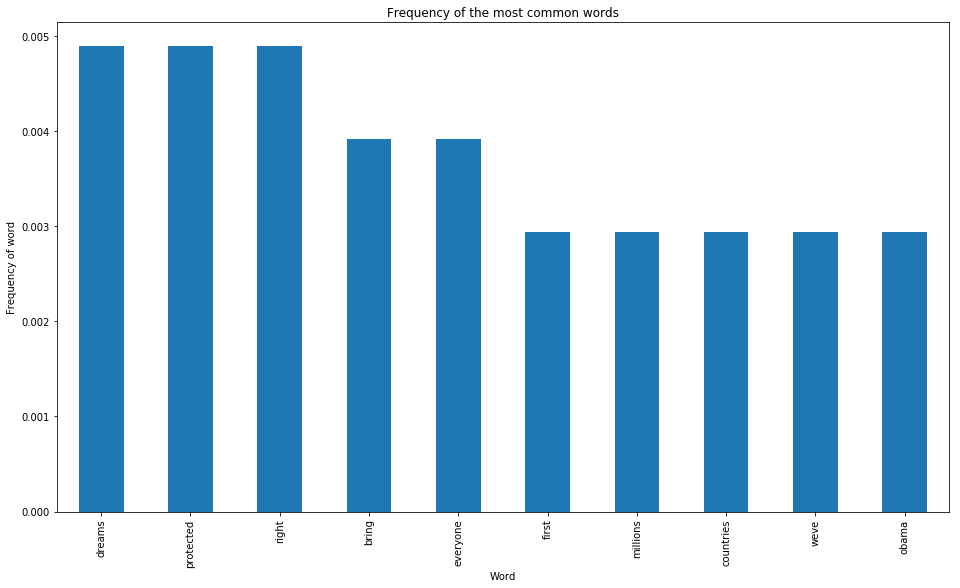

Top words in document Obama's speech
	Word: less, TF-IDF: 0.00415
	Word: common, TF-IDF: 0.00356
	Word: generation, TF-IDF: 0.00296


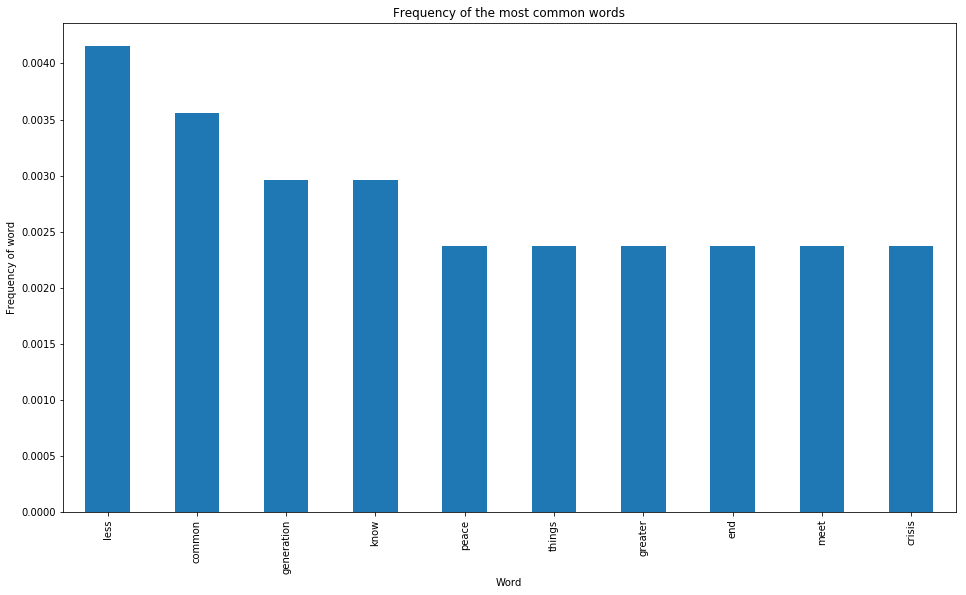

In [14]:
# install textblob library and define functions for TF-IDF
nltk.download('punkt')
import math
from textblob import TextBlob as tb
import pandas as pd

def tf(word, doc):
    lenOfDoc = len(doc.words)
    if lenOfDoc < 1: 
        return 0
    else: 
        return doc.words.count(word) / lenOfDoc

def contains(word, docs):
    return sum(1 for doc in docs if word in doc.words)

def idf(word, docs):
    docsCount = contains(word, docs)
    if docsCount < 1 : return 0
    else: return math.log(len(docs) / docsCount)

def tfidf(word, doc, docs):
    return tf(word,doc) * idf(word, docs)


# Create a collection of documents as textblobs
docTr = tb(txtTr)
docOba = tb(txtOba)
docs = [docTr,docOba]
docs_name = ["Trump's speech", "Obama's speech"]

# Use TF-IDF to get the three most important words from each document and plot the scores from high to low

for i, doc in enumerate(docs):
    print("Top words in document {}".format(docs_name[i]))
    scores = {word: tfidf(word, doc, docs) for word in doc.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:3]:
        print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))
    # Get Frequency distribution
    count_frame = pd.DataFrame(scores, index =[0]).T
    count_frame.columns = ['Count']
    # Plot frequency
    counts = count_frame.sort_values('Count', ascending = False)
    fig = plt.figure(figsize=(16, 9))
    ax = fig.gca()    
    counts['Count'][:10].plot(kind = 'bar', ax = ax)
    ax.set_title('Frequency of the most common words')
    ax.set_ylabel('Frequency of word')
    ax.set_xlabel('Word')
    plt.show()


            Count
chief           1
justice         1
roberts         1
president       5
carter          1
clinton         1
bush            1
obama           3
fellow          1
americans       4
people          9
world           6
thank           2
citizens        4
america        17
joined          1
great           6
national        2
effort          1
rebuild         1
country         9
restore         1
promise         1
together        4
determine       1
course          1
years           2
come            1
face            2
challenges      1
...           ...
look            1
night           1
sky             1
fill            1
infused         1
almighty        1
creator         1
near            1
far             1
large           1
mountain        2
ocean           2
hear            1
words           1
ignored         1
voice           1
hopes           1
define          1
courage         1
goodness        1
love            1
forever         1
guide           1
along     

You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


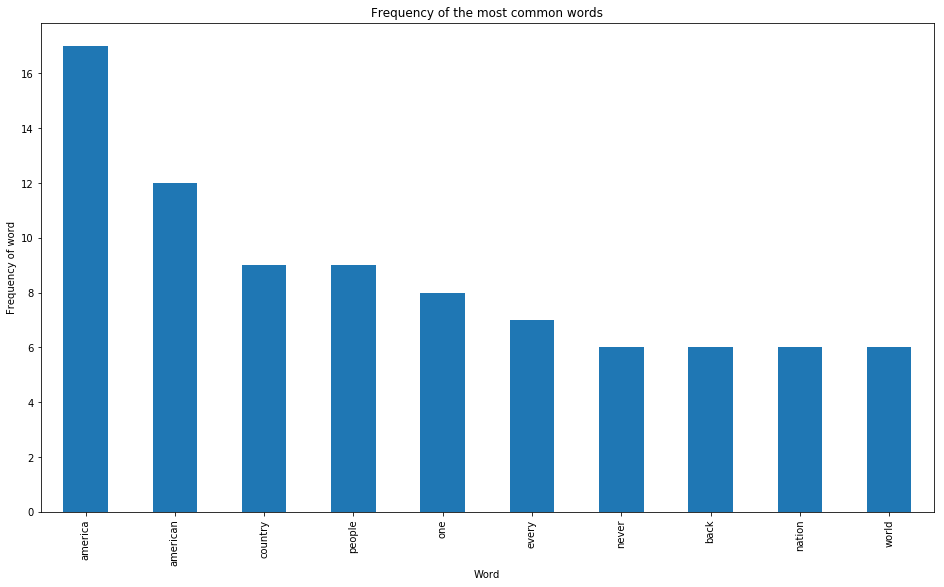

In [4]:
%matplotlib inline
!pip install matplotlib

import matplotlib
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
# Get Frequency distribution
words = nltk.tokenize.word_tokenize(txt1)
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']
print(count_frame)
# Plot frequency
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:10].plot(kind = 'bar', ax = ax)
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()